In [1]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import tensorflow.keras

train_path="./Datasets/FER-2013/train"
test_path ="./Datasets/FER-2013/test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

print(class_names)
print(class_names_test)

#Sample datasets images
# image_sad=cv2.imread(train_path+"/sad/PrivateTest_2913")
# cv2_imshow(image_sad)
# image_happy=cv2.imread(train_path+"/happy/PrivateTest_1206")
# cv2_imshow(image_happy)

train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential, Model,load_model

base_model = ResNet50(input_shape=(224, 224, 3))

headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(7,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

model = Model(inputs=base_model.input, outputs=headModel)

In [7]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [4]:
for layer in base_model.layers:
    layer.trainable = False
for layer in model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000002367CFDDF10> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x0000023607016F40> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000023607029760> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x0000023607029430> False
<tensorflow.python.keras.layers.core.Activation object at 0x000002360706BBB0> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x0000023607077340> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000023607077970> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000236070CCD90> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x00000236070CCA60> False
<tensorflow.python.keras.layers.core.Activation object at 0x00000236070DE6A0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002360

In [6]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=["acc",
                                                                          tensorflow.keras.metrics.Precision(), 
                                                                          tensorflow.keras.metrics.Recall(), 
                                                                          tensorflow.keras.metrics.TopKCategoricalAccuracy()])

es=EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)
# mc = ModelCheckpoint('/content/drive/MyDrive/ComputerVision/best_model_resnet50.h5', monitor='val_accuracy', mode='auto')

tensorflow.debugging.set_log_device_placement(True)

gpus = tensorflow.config.list_physical_devices('GPU')
print(gpus)
# with tensorflow.device(gpus[0].name):
#     H = model.fit_generator(train_generator,validation_data=test_generator,epochs=50,verbose=1,callbacks=[es])
    

[]


In [7]:
# model.load_weights("./best_model_resnet50.h5")
model.save('resnet50_model.h5')

KeyboardInterrupt: 

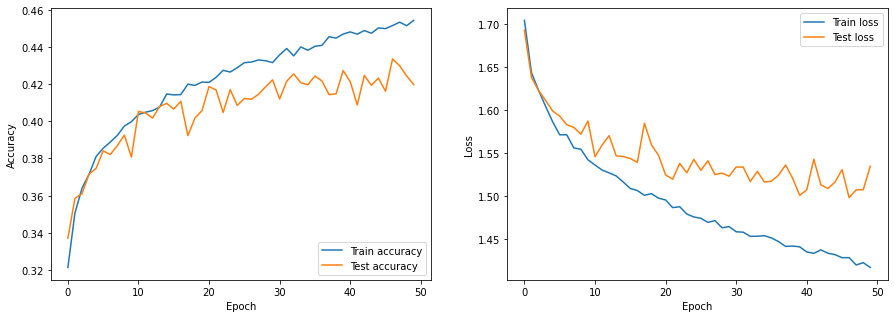

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(H.history['acc'], label='accuracy')
plt.plot(H.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train accuracy','Test accuracy'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(H.history['loss'], label='loss')
plt.plot(H.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train loss','Test loss'], loc='upper right')

test_loss, test_acc = model.evaluate(test_generator, verbose=2)

In [ ]:



cnn.evaluate(test_set)
preds = cnn.predict(test_set)
y_preds = np.argmax(preds , axis = 1 )
y_test = np.array(test_set.labels)

cm_data = confusion_matrix(y_test , y_preds)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [ ]:
model.evaluate_generator(test_generator)